# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Imanuel Pradika Laksono
- **Email:** m008d4ky2712@bangkit.academy
- **ID Dicoding:** imanueldika

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv(f"https://drive.google.com/uc?id=1Ygd-BTLt_NFLRJVrSSR3KM5OnjJRLjLS")
items_df = pd.read_csv(f"https://drive.google.com/uc?id=1ErRu2dUam5vQmakZrUJDKZZrgH0y-XaX")
payments_df = pd.read_csv(f"https://drive.google.com/uc?id=1wiSVoi2jijQLhjpW0MTG_9DRK306LdUs")
orders_df = pd.read_csv(f"https://drive.google.com/uc?id=1GdnFJS-SzdsSSOWumiACdNUUHv2s279Q")
category_df = pd.read_csv(f"https://drive.google.com/uc?id=1PihVKBBZ51GlBW7Ft-G6p2iUUDoXFdrD")
products_df = pd.read_csv(f"https://drive.google.com/uc?id=1WmjVIsWhx898jRJrddiyba5hrhfaGgG0")
sellers_df = pd.read_csv(f"https://drive.google.com/uc?id=1sVC5a6AW89hQhNHQc0tGfqFQuWdsJJo6")

data = {
    'customers': customers_df,

    'items': items_df,
    'payments': payments_df,
    'orders': orders_df,
    'category': category_df,
    'products': products_df,
    'sellers': sellers_df,
}

In [3]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [10]:
for name, df in data.items():
  print('\n', data[name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null

In [12]:
datetime_type = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_type:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

datetime_items = ["shipping_limit_date"]

for column in datetime_items:
  data['items'][column] = pd.to_datetime(data['items'][column])

datetime_reviews = ["review_creation_date","review_answer_timestamp"]

In [13]:
duplicate_temp = {}
total_sample_temp = {}

for name, df in data.items():
  duplicate_temp[name] = df.duplicated().sum()
  total_sample_temp[name] = len(df)

duplicate_df = pd.DataFrame.from_dict(duplicate_temp, orient='index', columns=["Total Duplicate"])
total_sample_df = pd.DataFrame.from_dict(total_sample_temp, orient='index', columns=['Total Sample'])

pd.concat([total_sample_df, duplicate_df], axis=1)

,Total Sample,Total Duplicate
customers,99441,0
items,112650,0
payments,103886,0
orders,99441,0
category,71,0
products,32951,0
sellers,3095,0


In [14]:
null_temp = {}

for name, df in data.items():
  null_temp[name] = df.isna().sum()
  print(name, '\n', null_temp[name], '\n')

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

category 
 product_category_name            0
product_category_name_english    0
dtype: int64 

products 
 product_id                      0


### Cleaning Data

**I. Orders**

In [15]:
# Check order status
print(data['orders']['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


In [16]:
# Check total delivered order
print('Total delivered order: ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)))

Total delivered order: 97.02


In [17]:
# Drop each order not delivered
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

In [18]:
# check percentage data not null for each item in dataset
for key, value in data.items():
    for col in value.columns:
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737


In [20]:
print('Total orders missing delivery dates: ' + str(data['orders'].order_delivered_customer_date.isnull().sum()))

Total orders missing delivery dates: 0


In [21]:
# drop all data order are missing delivered dates
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)


In [22]:
print('Total orders missing delivery dates: ' + str(data['orders'].order_delivered_customer_date.isnull().sum()))

Total orders missing delivery dates: 0


**II. Products**

In [23]:
# check column products
print('Product cols: ' , data['products'].columns.values)

# drop product column because to many null data
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [24]:
# change the value of column product_category_name with another value
data['products']['product_category_name'].fillna(value='outro', inplace=True)

In [25]:
# change the value of column photos_qty with zero
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

In [26]:
data['products']

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0


## Exploratory Data Analysis (EDA)

### Explore customers

In [27]:
data['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [28]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [29]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore items

In [30]:
data['items'].describe(include='all')

<ipython-input-30-3ce1b546f739>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['items'].describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,110189,110189.000000,110189,110189,110189,110189.000000,110189.000000
unique,96470,NaN,32214,2970,91336,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,520,1996,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 23:11:33,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.198196,NaN,NaN,NaN,119.977937,19.948869
std,NaN,0.706700,NaN,NaN,NaN,182.304615,15.698615
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [31]:
# Menghitung jumlah produk terjual
product_sales = data['items'].groupby('product_id')['order_item_id'].count().reset_index(name='total_sales')

# Menampilkan produk yang paling banyak terjual
most_sold_product = product_sales.loc[product_sales['total_sales'].idxmax()]

# Menampilkan produk yang paling sedikit terjual
least_sold_product = product_sales.loc[product_sales['total_sales'].idxmin()]

print("Produk yang paling banyak terjual:")
print(most_sold_product)
print("\nProduk yang paling sedikit terjual:")
print(least_sold_product)

Produk yang paling banyak terjual:
product_id     aca2eb7d00ea1a7b8ebd4e68314663af
total_sales                                 520
Name: 21615, dtype: object

Produk yang paling sedikit terjual:
product_id     00066f42aeeb9f3007548bb9d3f33c38
total_sales                                   1
Name: 0, dtype: object


### Explore orders and payments

In [32]:
data['orders'].describe(include='all')

<ipython-input-32-c8f006a6f36e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['orders'].describe(include='all')
<ipython-input-32-c8f006a6f36e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['orders'].describe(include='all')
<ipython-input-32-c8f006a6f36e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['orders'].describe(include='all')
<ipython-input-32-c8f006a6f36e>

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96470,96470,96470,96470,96456,96469,96470,96470
unique,96470,96470,1,95948,88267,80106,95658,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96470,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [33]:
orders_groupby_status = data['orders'].groupby('order_status')['order_id'].count().reset_index(name='total_orders')
print(orders_groupby_status)


  order_status  total_orders
0    delivered         96470


In [34]:
orders_groupby_month = data['orders'].groupby(data['orders']['order_purchase_timestamp'].dt.to_period('M'))['order_id'].count().reset_index(name='total_orders')
print(orders_groupby_month)

   order_purchase_timestamp  total_orders
0                   2016-09             1
1                   2016-10           265
2                   2016-12             1
3                   2017-01           750
4                   2017-02          1653
5                   2017-03          2546
6                   2017-04          2303
7                   2017-05          3545
8                   2017-06          3135
9                   2017-07          3872
10                  2017-08          4193
11                  2017-09          4150
12                  2017-10          4478
13                  2017-11          7288
14                  2017-12          5513
15                  2018-01          7069
16                  2018-02          6555
17                  2018-03          7003
18                  2018-04          6798
19                  2018-05          6749
20                  2018-06          6096
21                  2018-07          6156
22                  2018-08       

In [35]:
data['payments'].describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,100748,100748.000000,100748,100748.000000,100748.000000
unique,96469,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,NaN,credit_card,NaN,NaN
freq,26,NaN,74579,NaN,NaN
mean,NaN,1.088379,NaN,2.851640,153.065896
std,NaN,0.652754,NaN,2.684452,214.458639
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.780000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.290000


In [36]:
total_payment_per_type = data['payments'].groupby('payment_type')['payment_value'].sum().reset_index(name='total_payment')
print(total_payment_per_type)

  payment_type  total_payment
0       boleto     2769932.58
1  credit_card    12100070.20
2   debit_card      208066.88
3      voucher      343013.19


In [ ]:
total_installments_payment = data['payments'].groupby('payment_installments')['payment_value'].sum().reset_index(name='total_payment')
print(total_installments_payment)

In [38]:
# Menggabungkan dataframes orders_df, items_df, dan payments_df
data['orders']['order_purchase_timestamp'] = pd.to_datetime(data['orders']['order_purchase_timestamp'])
data['orders']['order_month'] = data['orders']['order_purchase_timestamp'].dt.to_period('M').astype(str)
orders_items_df = pd.merge(data['orders'], data['items'], on='order_id')
orders_items_payments_df = pd.merge(orders_items_df, data['payments'], on='order_id')

# Menghitung total pendapatan per bulan
monthly_revenue_df = orders_items_payments_df.groupby('order_month')['price'].sum().reset_index()

# Menghitung jumlah pesanan per bulan
monthly_orders_df = orders_items_payments_df.groupby('order_month')['order_id'].count().reset_index()


### Explore products and category

In [39]:
data['products'].describe(include='all')

,product_id,product_category_name,product_photos_qty
count,32951,32951,32951.000000
unique,32951,74,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN
freq,1,3029,NaN
mean,NaN,NaN,2.148463
std,NaN,NaN,1.745732
min,NaN,NaN,0.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,3.000000


In [40]:
data['category'].describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [41]:
# Merge data products dengan items
items_products_df = pd.merge(data['items'], data['products'], on='product_id')

# Merge data merged_df dengan category
items_products_category_df = pd.merge(items_products_df, data['category'], left_on='product_category_name', right_on='product_category_name')

total_sales_per_category_df = items_products_category_df.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False).reset_index(name='total_sales')
print(total_sales_per_category_df)

   product_category_name_english  total_sales
0                 bed_bath_table        10953
1                  health_beauty         9465
2                 sports_leisure         8430
3                furniture_decor         8160
4          computers_accessories         7643
..                           ...          ...
66         arts_and_craftmanship           24
67                    la_cuisine           14
68             cds_dvds_musicals           14
69     fashion_childrens_clothes            7
70         security_and_services            2

[71 rows x 2 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

<ipython-input-42-a657a9ca6329>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="product_category_name_english", data=total_sales_per_category_df.head(5), palette=colors, ax=ax[0])
<ipython-input-42-a657a9ca6329>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="product_category_name_english", data=total_sales_per_category_df.sort_values(by="total_sales", ascending=True).head(5), palette=colors, ax=ax[1])


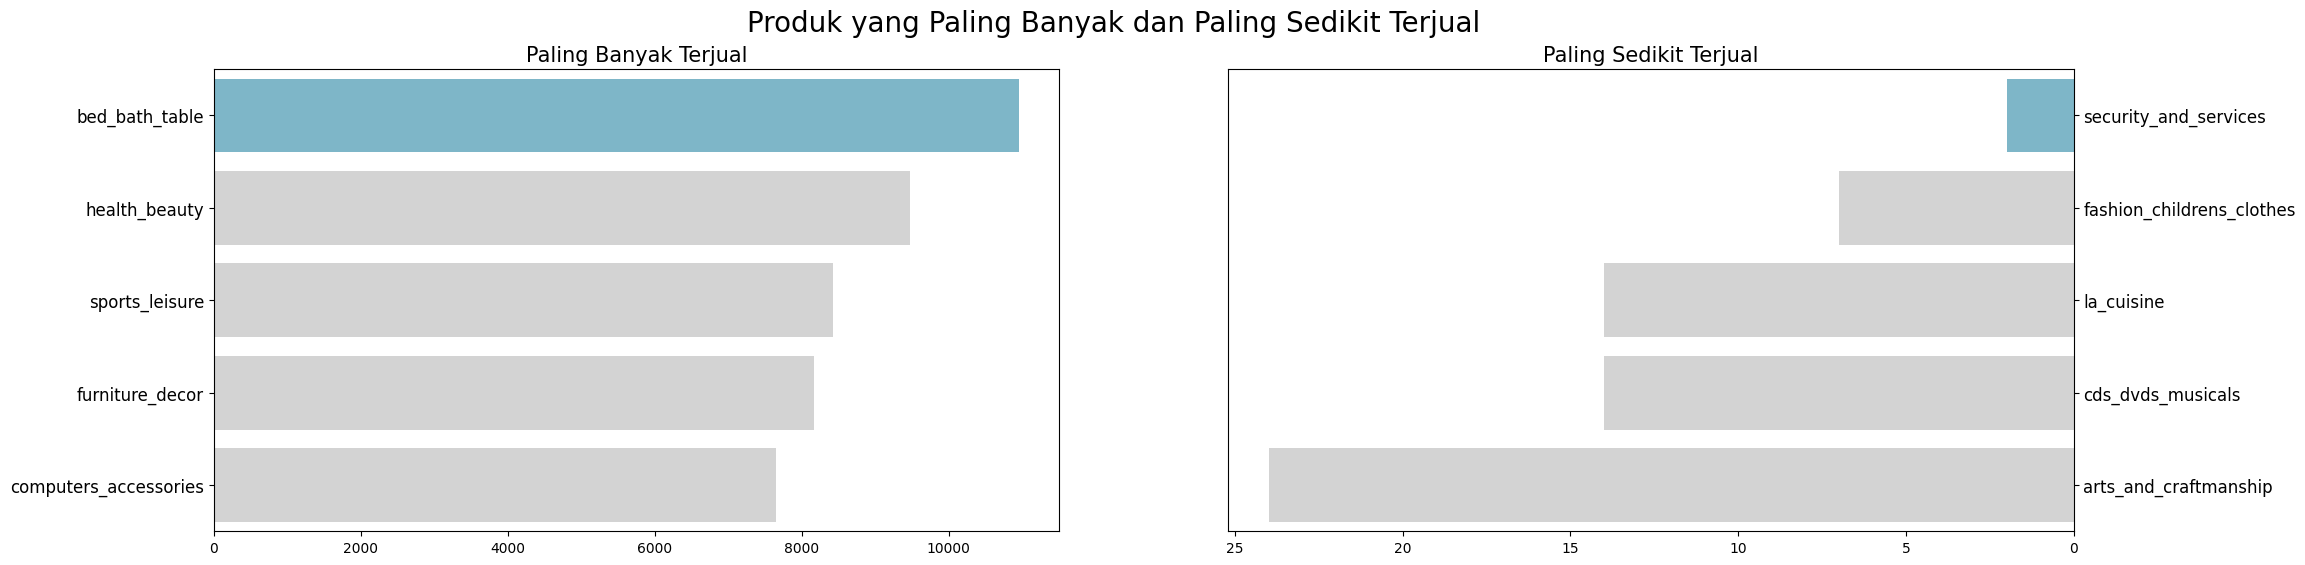

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_sales", y="product_category_name_english", data=total_sales_per_category_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Paling Banyak Terjual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="total_sales", y="product_category_name_english", data=total_sales_per_category_df.sort_values(by="total_sales", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Paling Sedikit Terjual", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk yang Paling Banyak dan Paling Sedikit Terjual", fontsize=20)
plt.show()

In [43]:
most_sold_category = total_sales_per_category_df.loc[total_sales_per_category_df['total_sales'].idxmax()]
print("Kategori produk yang paling banyak terjual:")
print(most_sold_category)

least_sold_category = total_sales_per_category_df.loc[total_sales_per_category_df['total_sales'].idxmin()]
print("\nKategori produk yang paling sedikit terjual:")
print(least_sold_category)

Kategori produk yang paling banyak terjual:
product_category_name_english    bed_bath_table
total_sales                               10953
Name: 0, dtype: object

Kategori produk yang paling sedikit terjual:
product_category_name_english    security_and_services
total_sales                                          2
Name: 70, dtype: object


### Pertanyaan 2: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?


In [44]:
# Gabungkan kedua dataframe berdasarkan kolom 'order_month'
orders_revenue_df = pd.merge(monthly_revenue_df, monthly_orders_df, on='order_month')

# Tampilkan tabel gabungan
print(orders_revenue_df)


   order_month       price  order_id
0      2016-10    41679.78       330
1      2016-12       10.90         1
2      2017-01   120123.48       963
3      2017-02   245926.84      1962
4      2017-03   381305.59      3078
5      2017-04   361157.69      2707
6      2017-05   528278.78      4260
7      2017-06   441916.18      3687
8      2017-07   515638.46      4726
9      2017-08   579291.09      5053
10     2017-09   644282.48      5003
11     2017-10   677378.42      5455
12     2017-11  1022571.56      8812
13     2017-12   752372.57      6440
14     2018-01   961101.67      8364
15     2018-02   860867.82      7765
16     2018-03   994744.41      8337
17     2018-04  1006279.64      8112
18     2018-05  1012647.65      8104
19     2018-06   899653.79      7318
20     2018-07   897017.92      7196
21     2018-08   868332.81      7354


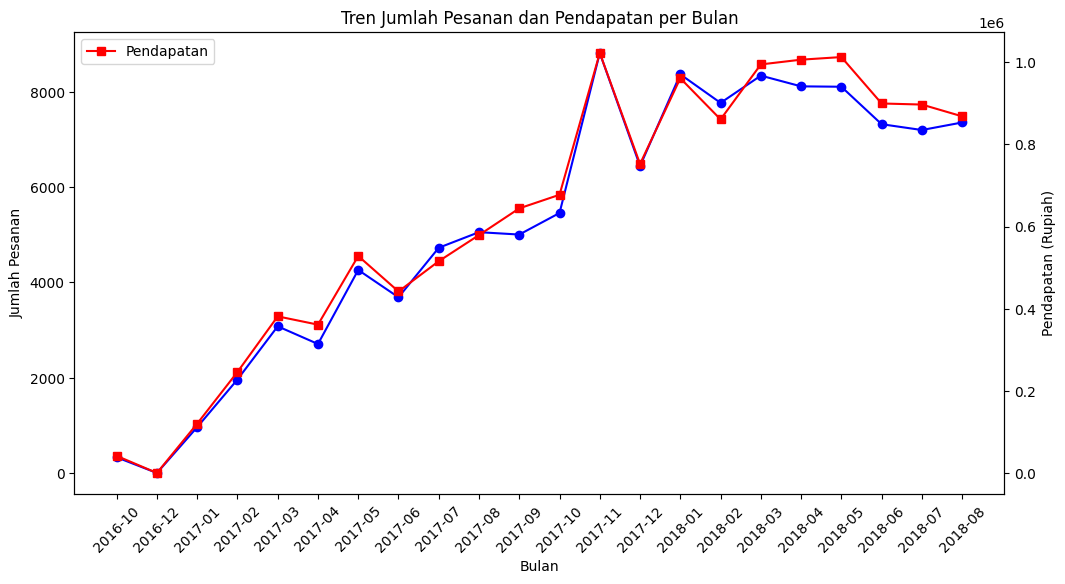

In [45]:
# Membuat grafik tren penjualan dan pendapatan dalam satu grafik
plt.figure(figsize=(12, 6))

# Grafik tren jumlah pesanan per bulan
plt.plot(orders_revenue_df['order_month'], orders_revenue_df['order_id'], marker='o', color='b', label='Jumlah Pesanan')
plt.title('Tren Jumlah Pesanan dan Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)

# Menambahkan sumbu y kedua untuk pendapatan
plt.twinx()
plt.plot(orders_revenue_df['order_month'],orders_revenue_df['price'], marker='s', color='r', label='Pendapatan')
plt.ylabel('Pendapatan (Rupiah)')

# Menampilkan legenda
plt.legend(loc='upper left')

plt.show()

### Pertanyaan 3, 4, dan 5


In [47]:
# Menghitung RFM
all_df = pd.merge(data['orders'], data['payments'], on='order_id', how='left')
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
recent_date = pd.to_datetime('today')
rfm_df["recency"] = (recent_date - pd.to_datetime(rfm_df["max_order_timestamp"])).dt.days

# Rata-rata frekuensi transaksi per bulan
months_since_last_purchase = rfm_df['recency'] / 30
rfm_df['average_purchase_frequency'] = rfm_df['frequency'] / months_since_last_purchase

# Rata-rata pengeluaran per bulan
rfm_df['average_purchase_amount'] = rfm_df['monetary'] / months_since_last_purchase


rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df.head())

                        customer_id  frequency  monetary  recency  \
0  00012a2ce6f8dcda20d059ce98491703          1    114.74     2302   
1  000161a058600d5901f007fab4c27140          1     67.41     2423   
2  0001fd6190edaaf884bcaf3d49edf079          1    195.42     2561   
3  0002414f95344307404f0ace7a26f1d5          1    179.35     2392   
4  000379cdec625522490c315e70c7a9fb          1    107.01     2163   

   average_purchase_frequency  average_purchase_amount  
0                    0.013032                 1.495308  
1                    0.012381                 0.834626  
2                    0.011714                 2.289184  
3                    0.012542                 2.249373  
4                    0.013870                 1.484189  


<ipython-input-48-8f3f09905f52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-48-8f3f09905f52>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-48-8f3f09905f52>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="

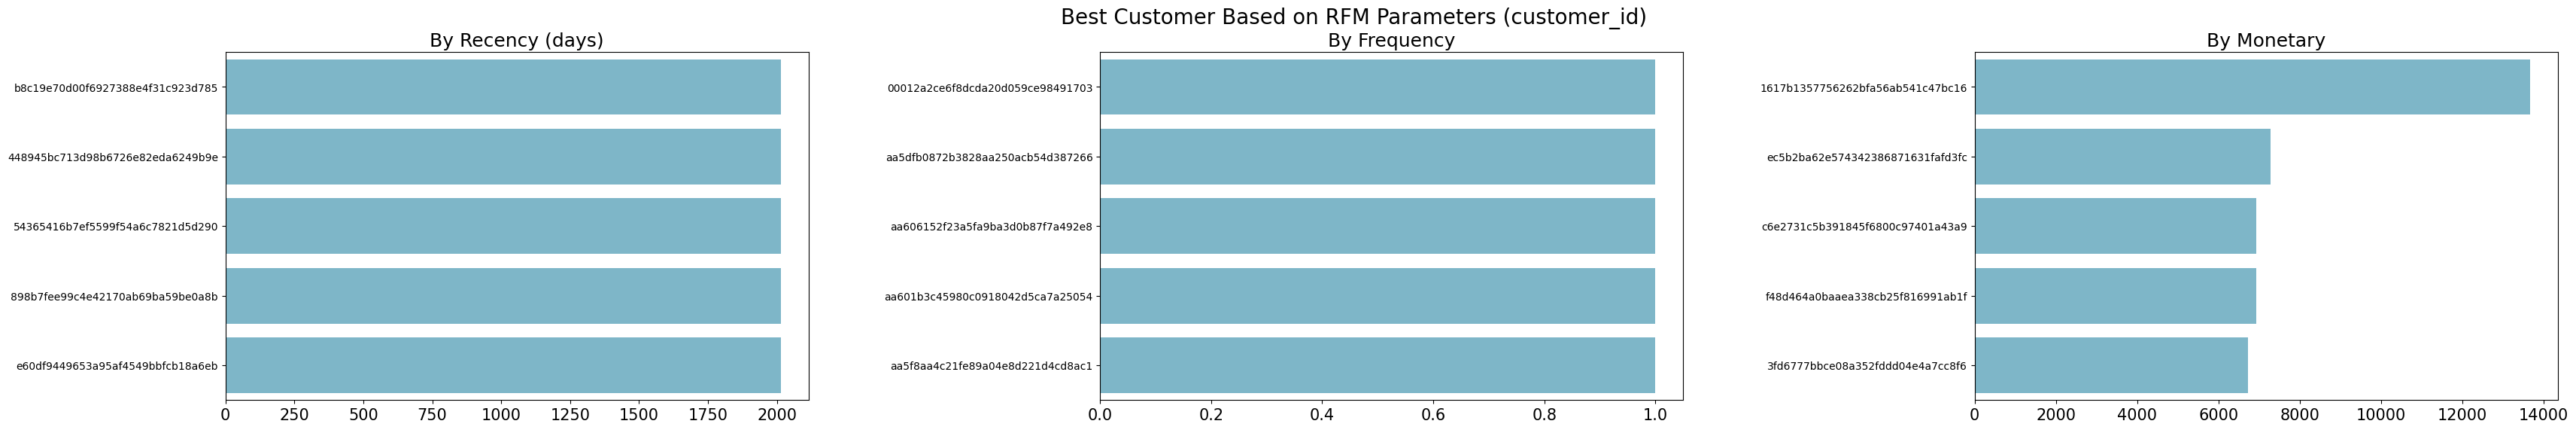

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="customer_id", x="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.subplots_adjust(wspace=0.5)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

- Berdasarkan *barplot* Produk Paling Banyak dan Paling Sedikit Terjual di atas, maka diperoleh bahwa **bed_bath_table** adalah produk yang paling banyak terjual sementara **security_and_services** adalah produk yang paling sedikit terjual
- Berdasarkan grafik Tren jumlah pemesanan dan pendapatan per Bulan di atas, terlihat adanya tren positif dalam performa penjualan perusahaan dari September 2016 hingga September 2018. Peningkatan ini menunjukkan bahwa perusahaan mengalami pertumbuhan yang baik dalam hal penjualan dan pendapatan selama periode tersebut.
- Untuk pelanggan pertama dengan customer_id '00012a2ce6f8dcda20d059ce98491703', terakhir kali dia melakukan transaksi adalah 2302 hari yang lalu. Untuk pelanggan lainnya, informasi serupa dapat ditemukan dengan melihat nilai recency pada tabel.
- Berdasarkan nilai average_purchase_frequency, pelanggan pertama melakukan pembelian sekitar 0.013 kali per bulan. Sementara itu, pelanggan lainnya memiliki nilai yang berbeda-beda yang tertera pada tabel.
- Dalam beberapa bulan terakhir, pelanggan pertama menghabiskan rata-rata sekitar 1.495308 unit mata uang, sedangkan pelanggan lainnya memiliki nilai yang berbeda sesuai tertera pada tabel.

## Download Dataset

In [49]:
total_sales_per_category_df.to_csv("total_sales_per_category_df.csv", index=False)

In [50]:
orders_revenue_df.to_csv("orders_revenue_df.csv", index=False)

In [51]:
rfm_df.to_csv("rfm_df.csv", index=False)